In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [84]:
import seaborn as sns
sns.set()

In [3]:
bike = pd.read_csv ("TEST.csv")

In [4]:
bike.head()

,wkday_ct,wkend_ct,TrafDir,BikeInfra,SegNum,StLength,Rd_Wd
0,139,120,0,0,30,10891,60
1,95,73,0,0,20,7364,60
2,24,12,0,0,9,2792,60
3,873,566,1,1,79,18112,75
4,1385,1303,1,0,145,24855,80


In [28]:
corr1 = bike.corr()

In [29]:
corr1

,wkday_ct,wkend_ct,TrafDir,BikeInfra,SegNum,StLength,Rd_Wd
wkday_ct,1.000000,0.946052,0.107876,0.292962,0.362279,0.273654,0.213285
wkend_ct,0.946052,1.000000,0.118139,0.202344,0.399161,0.281704,0.263906
TrafDir,0.107876,0.118139,1.000000,-0.138967,0.036725,0.038503,-0.127758
BikeInfra,0.292962,0.202344,-0.138967,1.000000,0.051552,0.075300,0.029144
SegNum,0.362279,0.399161,0.036725,0.051552,1.000000,0.926643,0.662078
StLength,0.273654,0.281704,0.038503,0.075300,0.926643,1.000000,0.503591
Rd_Wd,0.213285,0.263906,-0.127758,0.029144,0.662078,0.503591,1.000000


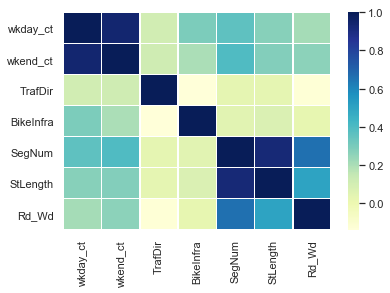

In [32]:
sns.heatmap(corr1, linewidths=.5, cmap="YlGnBu")

In [55]:
#Weekday

y = bike['wkday_ct']
X = bike['Rd_Wd']

In [56]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wkday_ct   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.480
Date:                Wed, 03 Apr 2019   Prob (F-statistic):             0.0369
Time:                        16:11:43   Log-Likelihood:                -670.31
No. Observations:                  96   AIC:                             1345.
Df Residuals:                      94   BIC:                             1350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.5699     78.458      0.734      0.465     -98.210     213.350
Rd_Wd          1.9984      0.944      2.117      0.037       0.124       3.873
==============================================================================
Omnibus:                       59.532   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.586
Skew:                           2.249   Prob(JB):                     1.52e-42
Kurtosis:                       8.283   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

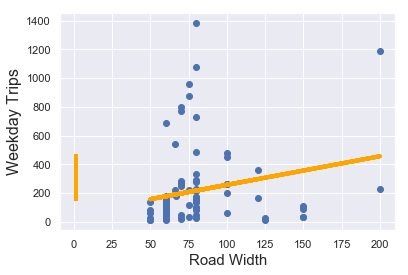

In [57]:
#Weekday
plt.scatter(X,y) 
reg = 57.56+1.99*X
fig = plt.plot (x, reg, lw = 4, c = 'orange', label = 'Regression Line')
plt.xlabel ('Road Width',fontsize = 15)
plt.ylabel ('Weekday Trips',fontsize = 16)
plt.show()

In [58]:
import seaborn as sns
sns.set (style = "whitegrid")

In [59]:
#Weekend

y1 = bike['wkend_ct']
X1 = bike['Rd_Wd']

In [60]:
x1 = sm.add_constant(X1)
results = sm.OLS(y1,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wkend_ct   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     7.037
Date:                Wed, 03 Apr 2019   Prob (F-statistic):            0.00937
Time:                        16:13:15   Log-Likelihood:                -647.95
No. Observations:                  96   AIC:                             1300.
Df Residuals:                      94   BIC:                             1305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7454     62.154      0.334      0.739    -102.663     144.154
Rd_Wd          1.9842      0.748      2.653      0.009       0.499       3.469
==============================================================================
Omnibus:                       74.744   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.638
Skew:                           2.600   Prob(JB):                     3.75e-93
Kurtosis:                      11.908   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

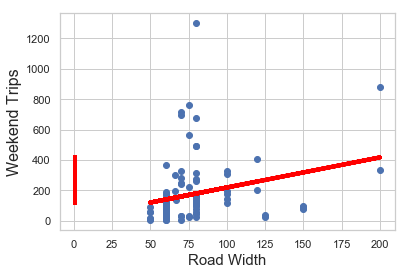

In [61]:
#Weekend
plt.scatter(X1,y1) 
reg1 = 20.74+ 1.98*X1
fig = plt.plot (x1, reg1, lw = 4, c = 'red', label = 'Regression Line')
plt.xlabel ('Road Width',fontsize = 15)
plt.ylabel ('Weekend Trips',fontsize = 16)
plt.show()

# Multiple Regression

In [62]:
#Weekday

y2 = bike['wkday_ct']
X2 = bike[['SegNum', 'StLength','BikeInfra', 'Rd_Wd']]

In [63]:
x2 = sm.add_constant(X2)
results = sm.OLS(y2,x2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wkday_ct   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     7.765
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           1.98e-05
Time:                        16:14:49   Log-Likelihood:                -658.45
No. Observations:                  96   AIC:                             1327.
Df Residuals:                      91   BIC:                             1340.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        215.8882     89.545      2.411      0.018      38.018     393.758
SegNum         4.0345      1.173      3.438      0.001       1.704       6.365
StLength      -0.0127      0.005     -2.386      0.019      -0.023      -0.002
BikeInfra    220.3782     68.736      3.206      0.002      83.843     356.913
Rd_Wd         -1.5667      1.229     -1.274      0.206      -4.009       0.875
==============================================================================
Omnibus:                       39.080   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.480
Skew:                           1.451   Prob(JB):                     9.20e-23
Kurtosis:                       7.117   Cond. No.                     8.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
#Weekend

y3 = bike['wkend_ct']
X3 = bike[['SegNum', 'StLength','BikeInfra', 'Rd_Wd']]

In [67]:
x3 = sm.add_constant(X3)
results = sm.OLS(y3,x3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wkend_ct   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     8.211
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           1.06e-05
Time:                        16:15:55   Log-Likelihood:                -636.62
No. Observations:                  96   AIC:                             1283.
Df Residuals:                      91   BIC:                             1296.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.0877     71.333      2.525      0.013      38.393     321.782
SegNum         3.7847      0.935      4.049      0.000       1.928       5.641
StLength      -0.0128      0.004     -3.002      0.003      -0.021      -0.004
BikeInfra    123.2045     54.756      2.250      0.027      14.438     231.971
Rd_Wd         -1.1413      0.979     -1.165      0.247      -3.087       0.804
==============================================================================
Omnibus:                       54.925   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.656
Skew:                           1.767   Prob(JB):                     5.10e-61
Kurtosis:                      10.544   Cond. No.                     8.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X4 = bike[['SegNum', 'StLength', 'BikeInfra', 'Rd_Wd']]
y4 = bike['wkday_ct']

In [70]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.4, random_state=101)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lm = LinearRegression()

In [80]:
lm.fit(X4_train,y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
predictions = lm.predict(X4_test)

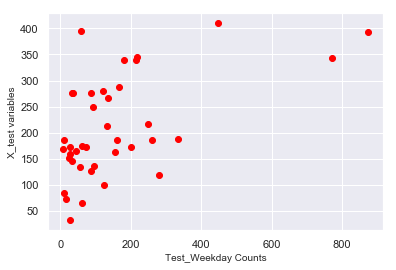

In [87]:
plt.scatter(y4_test,predictions, c = 'red')
plt.xlabel ('Test_Weekday Counts',fontsize = 10)
plt.ylabel ('X_test variables',fontsize = 10)
plt.show()


In [83]:
predictions

array([133.81766271, 342.26059588,  32.20093542, 215.93838078,
       288.23962118, 212.05677023,  65.36112115, 279.33785382,
       267.10011928,  73.0133473 , 187.01661417, 249.72024712,
       168.97208818, 392.1816936 , 277.08633569, 136.34720346,
       277.08633569, 162.31820807, 339.83736457, 394.97427541,
       152.34434259, 185.36366816, 127.64995917, 185.54785728,
       277.08633569, 172.47154358, 160.16537376, 172.74915138,
       344.94482779, 410.6527293 , 100.52488438, 173.63651444,
       173.76167732, 145.31806772,  85.63431783, 187.26270739,
       165.62827488, 120.03182462, 338.80360577])